### 导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1、线性逻辑回归

### 1.1 读取数据

In [84]:
data1 = pd.read_table('ex2data1.txt', sep=',',header=None)   # (100, 3)
x = data1[[0,1]]   # (100,2) # DataFrame
y = data1[2]      # (100,)  # Series

### 1.2 可视化数据

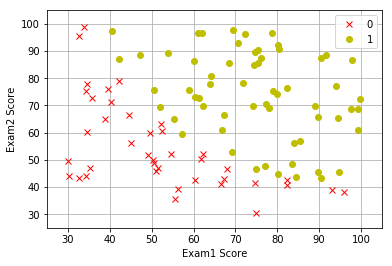

In [85]:
def plot_data(x,y):
    plt.plot(x[y==0][0], x[y==0][1], 'rx', label='0') # DataFrame的选列与ndarray的选列有区别
    plt.plot(x[y==1][0], x[y==1][1], 'yo', label='1')
    plt.xlabel("Exam1 Score")
    plt.ylabel("Exam2 Score")
    plt.legend()
    plt.axis([25, 105, 25, 105])  # plt.xlim(-1, 11)
    plt.grid(True)
plot_data(x,y)

### 1.3 将数据转换成ndarray

In [86]:
X = np.insert(x.values, 0, 1, 1)  # 转换成ndarray并插入一列：(100, 3)
y = y.values.reshape(-1, 1)    # (100, 1)
m = X.shape[0]

### 1.4 求解参数theta
#### 1.4.1梯度下降求解（需要迭代特别多次）

In [87]:
def h(theta):  # theta.shape=(3, 1)
    return 1/(1 + np.exp(-np.dot(X, theta))) # 少加一个负号找半天！

def j(theta): # 数
    return -1/m * np.sum(y*np.log(h(theta))+(1-y)*np.log(1-h(theta))) # 可以直接使用np.mean

def g(theta, alpha, n):
    costs = []
    for _ in range(n):
        costs.append(j(theta))
        theta = theta - alpha/m * np.dot(X.T, h(theta)-y)
    return theta, costs

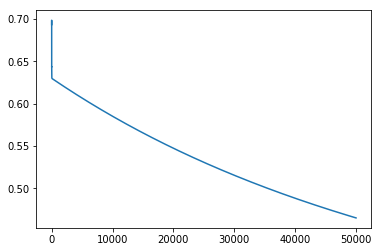

In [88]:
theta = np.zeros((3, 1))
j(theta)  # 0.6931471805599453

result = g(theta, 0.001, 50000) #alpha为0.002就不行，但是50000次之后还在下降
plt.plot(range(len(result[1])), result[1])

#### 1.4.2 scipy.optimize求解

In [89]:
def h(theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def j(theta):
    theta = theta.reshape(-1,1)
    return -1/m * np.sum(y*np.log(h(theta))+(1-y)*(np.log(1-h(theta))))

def gradient(theta):
    theta = theta.reshape(-1,1)
    grad = 1/m * np.dot(X.T, h(theta) - y)
    return grad.reshape(-1)# 返回(n,)

theta = np.zeros(3)
import scipy.optimize as opt
result = opt.fmin_tnc(func=j, x0=theta, fprime=gradient) # gradient与theta均为(n,)，不能为(n,1)
result # (array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [90]:
theta = result[0] #求解的theta
j(theta)          # 损失函数值：0.20349770158947494

0.20349770158947494

### 1.5 可视化决策边界

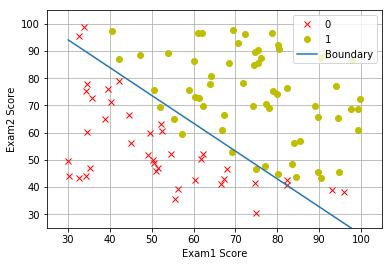

In [91]:
boundary_x = np.array([np.min(X[:, 1]), X[:,1].max()])
boundary_y = (-theta[0]-boundary_x*theta[1])/theta[2]
plot_data(x, y)
plt.plot(boundary_x, boundary_y, label='Boundary')
plt.legend()

### 1.6 计算误差率

In [92]:
predict = np.where(h(theta)>=0.5, 1, 0)
real = y.reshape(-1)
accuracy = np.sum(predict==real)/len(predict)
accuracy  # 0.89

0.89

## 2、非线性逻辑回归

### 2.1 导入数据

In [100]:
data2 = pd.read_table('ex2data2.txt', sep=',',header=None) 
data2.head()
x = data2[[0,1]] # dataframe
y = data2[2] # seires

### 2.2 可视化数据

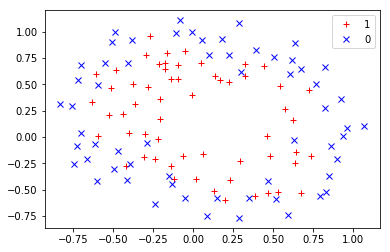

In [101]:
plt.plot(x[y==1][0], x[y==1][1],'r+',label='1')
plt.plot(x[y==0][0], x[y==0][1],'bx',label='0')
plt.legend()

### 2.3 数据变化：将特征x1、x2 转变为多项式特征

In [102]:
x = np.array(x) # (118, 2)
y = np.array(y).reshape(-1,1) # (118, 1)

In [103]:
def mapFeature(x, n): 
    '''x为(m, 2)的数组，n为degree，返回n次多项式'''
    k = 2
    for i in range(2, n+1): # i=0是常数项（插入了1），i=1是x1,x2（已经存在x1，x2）
        for j in range(i+1):
            v = (x[:, 0]**j) * (x[:, 1]**(i-j))
            x = np.insert(x, 2, v, 1)
            k = k + 1
    return x

In [104]:
X = np.insert(mapFeature(x, 6), 0, 1, 1)    # X.shape=(118, 28)
m = X.shape[1]

### 2.4 求解参数theta

In [106]:
def h(theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def j(theta):
    theta = theta.reshape(-1,1)
    return -1/m * np.sum(y*np.log(h(theta))+(1-y)*(np.log(1-h(theta))))

def gradient(theta):
    theta = theta.reshape(-1,1)
    grad = 1/m * np.dot(X.T, h(theta) - y)
    return grad.reshape(-1)# 返回(n,)

theta = np.zeros(X.shape[1])

import scipy.optimize as opt
result = opt.fmin_tnc(func=j, x0=theta, fprime=gradient) # gradient与theta均为(n,)，不能为(n,1)
result  # result[0].shape # (28,)

(array([ 6.80600481e+00,  6.03616202e+00,  4.18165177e+00, -3.09995212e+02,
        -4.38090385e+02, -6.19187911e+02, -4.20419873e+02, -4.29806419e+02,
        -1.23114749e+02, -2.31227087e+01,  1.17114817e+02,  1.84149579e+02,
         2.16441472e+02,  1.08456512e+02, -4.13191719e+00,  1.02409789e+01,
         2.52190460e+02,  2.36084404e+02,  2.88171389e+02,  9.14608781e+01,
         1.35979134e+01, -5.75874195e+01, -4.30870234e+01, -1.56634871e+00,
         1.37381737e-01, -6.74676336e+01, -3.53390130e+01, -1.91975526e+01]),
 280,
 3)

### 2.5 可视化非线性决策边界 

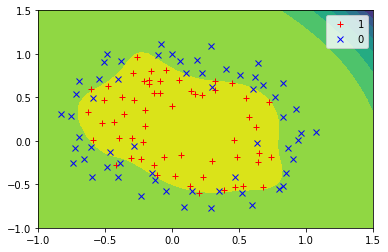

In [107]:
xvals, yvals = np.meshgrid(np.linspace(-1,1.5,50).reshape(-1, 1), np.linspace(-1,1.5,50).reshape(-1, 1)) # (50, 50)
grid = np.c_[xvals.ravel(), yvals.ravel()]  # (2500, 2)

grid_mapFeature = np.insert(mapFeature(grid, 6),0,1,1) # (2500, 28)

y_predict_matrix = np.dot(grid_mapFeature, result[0].reshape(-1,1))# (2500,1)

plt.plot(x[(y==1).reshape(-1)][:,0], x[(y==1).reshape(-1)][:,1],'r+',label='1')  # x.shape=(118, 2)
plt.plot(x[(y==0).reshape(-1)][:,0], x[(y==0).reshape(-1)][:,1],'bx',label='0')  # y.shape=(118, 1)
plt.legend()
plt.contourf(xvals, yvals, y_predict_matrix.reshape(xvals.shape))

## 3、非线性逻辑回归+正则化

### 3.1 导入数据

In [2]:
data3 = pd.read_table('ex2data2.txt', sep=',',header=None)
x = data3[[0,1]].values # (118, 2)
y = data3[2].values.reshape(-1, 1) # (118,1)

### 3.2 数据变换——转换为多项式特征

In [3]:
def mapFeature(x, n=6): 
    '''x为(m, 2)的数组，n为degree，返回n次多项式'''
    k = 2
    for i in range(2, n+1): # i=0是常数项（插入了1），i=1是x1,x2（已经存在x1，x2）
        for j in range(i+1):
            v = (x[:, 0]**j) * (x[:, 1]**(i-j))
            x = np.insert(x, 2, v, 1)
            k = k + 1
    return x

### 3.3 正则化求解theta

In [4]:
def h(theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def j(theta, lamb=0):
    theta = theta.reshape(-1,1)
    left = -1/m * np.sum(y*np.log(h(theta))+(1-y)*(np.log(1-h(theta))))
    right = lamb/(2*m) * np.sum(theta ** 2)
    return left + right

def gradient(theta, lamb=0):
    theta = theta.reshape(-1,1)
    grad = 1/m * np.dot(X.T, h(theta) - y) 
    grad[1:] = grad[1:] + lamb/m * theta[1:]   # 注意[1:]这种写法； 不需要求和！对theta(j)求导啊
    return grad.reshape(-1) # 返回(n,)

In [5]:
import scipy.optimize as opt

def theta_solve(theta, lamb):
    result = opt.fmin_tnc(func=j, x0=theta,args=(lamb,), fprime=gradient) # gradient与theta均为(n,)，不能为(n,1)
    return result

In [6]:
X = np.insert(mapFeature(x, 6), 0, 1, 1)
m = X.shape[0]
theta = np.zeros(X.shape[1])
result = theta_solve(theta, 0)

### 3.4 可视化

In [23]:
def plot_data(x, y):
    plt.plot(x[(y==1).reshape(-1)][:,0], x[(y==1).reshape(-1)][:,1],'r+',label='1')  # x.shape=(118, 2)
    plt.plot(x[(y==0).reshape(-1)][:,0], x[(y==0).reshape(-1)][:,1],'bx',label='0')  # y.shape=(118, 1)
    plt.legend()
    plt.xlabel("Exam 1")
    plt.ylabel("Exam 2")
    plt.grid()

def plot_boundary(theta, lamb):
    xvals, yvals = np.meshgrid(np.linspace(-1,1.5,50).reshape(-1, 1), np.linspace(-1,1.5,50).reshape(-1, 1)) # (50, 50)
    
    grid = np.c_[xvals.ravel(), yvals.ravel()]  # (2500, 2)
    grid_mapFeature = np.insert(mapFeature(grid, 6),0,1,1) # (2500, 28)
    
    y_predict_matrix = np.dot(grid_mapFeature, theta_solve(theta, lamb)[0].reshape(-1,1))# (2500,1)# plt.contourf
    plt.contour(xvals, yvals, y_predict_matrix.reshape(xvals.shape),[0]) # 这个[0]很重要，不然很多线
    plt.title('lambda=%d, Decision Boundary'%lamb)

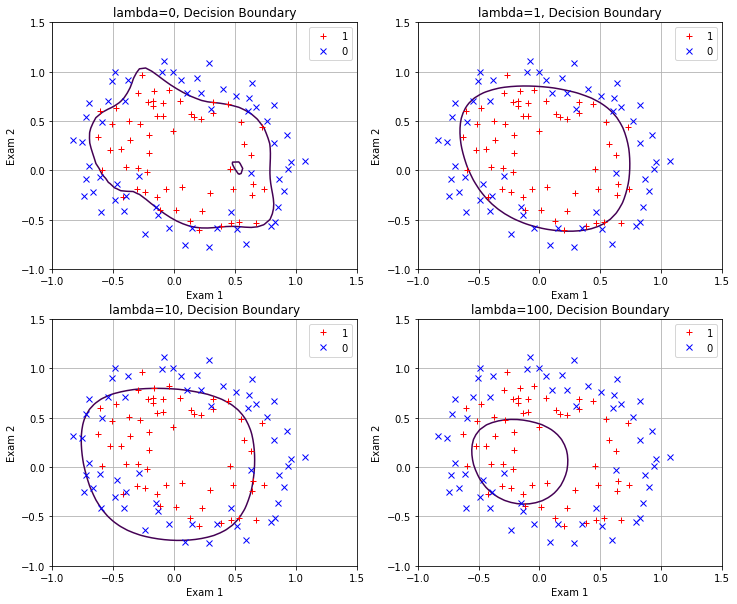

In [24]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plot_data(x, y)
plot_boundary(theta, 0)

plt.subplot(222)
plot_data(x, y)
plot_boundary(theta, 1)

plt.subplot(223)
plot_data(x, y)
plot_boundary(theta, 10)

plt.subplot(224)
plot_data(x, y)
plot_boundary(theta, 100)